In [4]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

# import the path of the project
sys.path.append(os.path.abspath("src"))

from utils.logger import CommLogger

#auto reload modules
%reload_ext autoreload
%autoreload 2

In [5]:
dataset_list = ['covtype', 'msd', 'gisette', 'realsim', 'epsilon', 'letter', 'radar']

In [6]:
# Generated by the statistic script, after monitoring the NIC we got the following results
# The unit is MB
gal = {
"radar": {"rx":1414.80, "tx":940.79},
"epsilon": {"rx":659.57, "tx":377.93},
"gisette": {"rx":45.95, "tx":25.31},
"msd": {"rx":73.83, "tx":42.02},
"realsim": {"rx":388.40, "tx":134.31},
"letter": {"rx":270.86, "tx":179.97},
"covtype": {"rx":2486.22, "tx":1661.31},
}

splitnn = {
"realsim": {"rx":4646.74, "tx":125.98},
"radar": {"rx":19615.60, "tx":247.96},
"gisette": {"rx":401.02, "tx":27.75},
"letter": {"rx":936.09, "tx":32.89},
"covtype": {"rx":34939.14, "tx":434.45},
"epsilon": {"rx":24202.17, "tx":310.06},
"msd": {"rx":27895.19, "tx":342.11},
}

# Total Communication Size

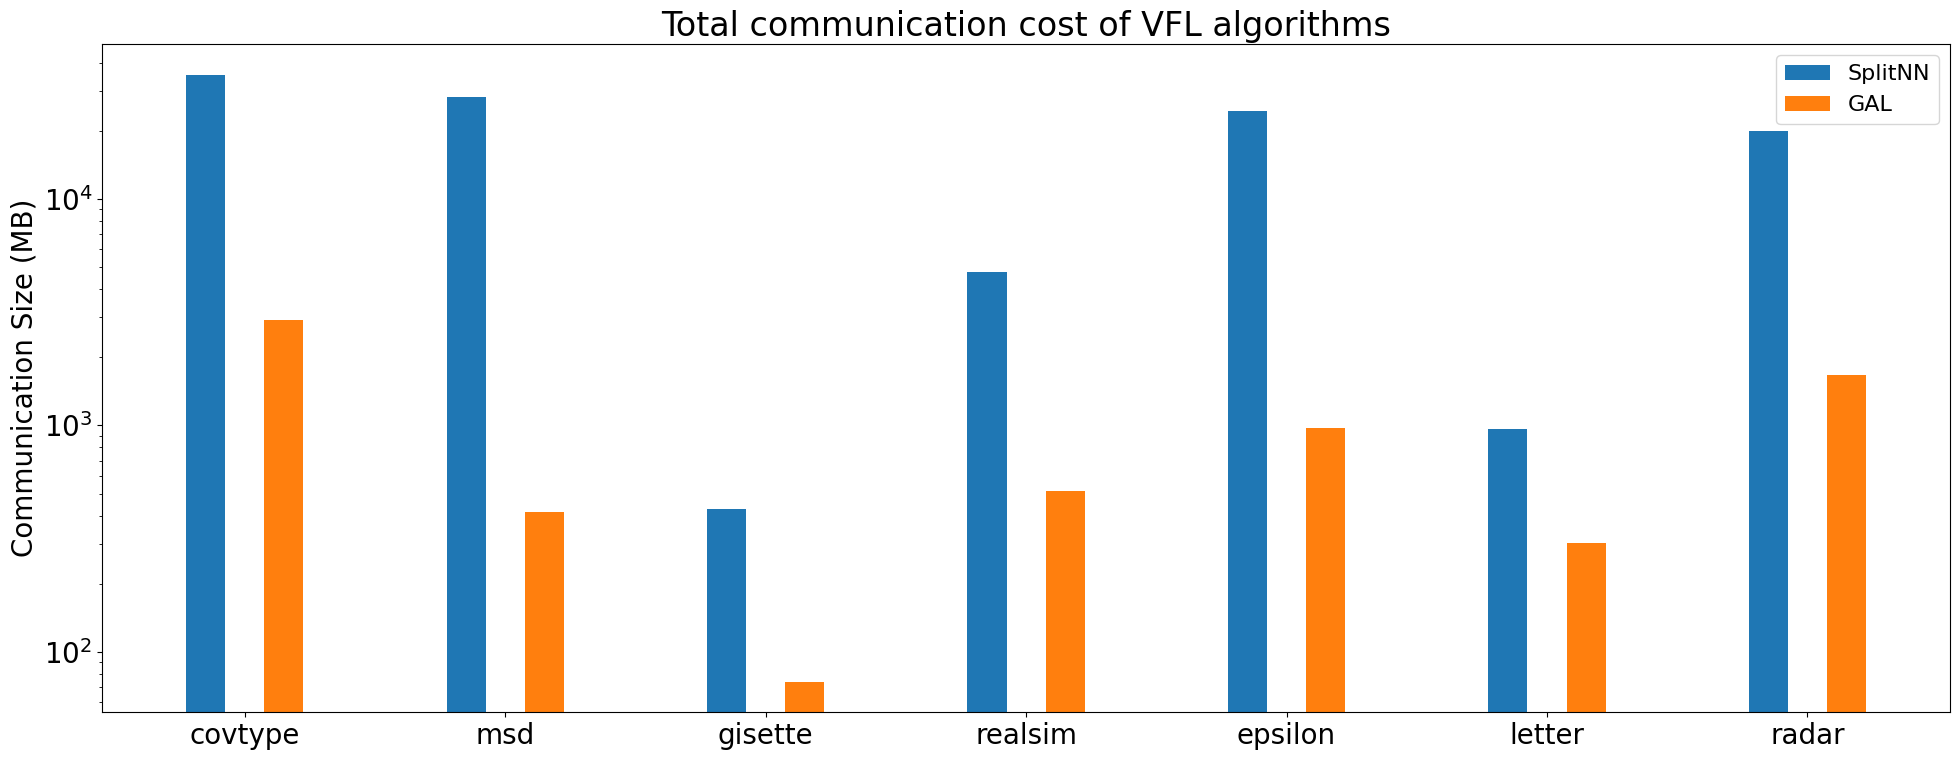

In [7]:

splitnn_comm_max_in_list = [ splitnn[ds]['rx'] for ds in dataset_list ]
splitnn_comm_max_out_list = [ splitnn[ds]['tx'] for ds in dataset_list ]
splitnn_comm_total_list = [ splitnn[ds]['rx'] + splitnn[ds]['tx'] for ds in dataset_list ]

gal_comm_max_in_list = [ gal[ds]['rx'] for ds in dataset_list ]
gal_comm_max_out_list = [ gal[ds]['tx'] for ds in dataset_list ]
gal_comm_total_list = [ gal[ds]['rx'] + splitnn[ds]['tx'] for ds in dataset_list ]

# plot the communication cost of each algorithm in a bar chart
algorithm_list = ['SplitNN', 'C-VFL', 'GAL', 'SecureBoost']

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(len(dataset_list))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width, splitnn_comm_total_list, width, label='SplitNN')
# rects2 = ax.bar(x, cvfl_comm_total_list, width, label='C-VFL')
rects3 = ax.bar(x + width, gal_comm_total_list, width, label='GAL')
# rects4 = ax.bar(x + 2 * width, secureboost_comm_total_list, width, label='FedTree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Communication Size (MB)')
ax.set_title('Total communication cost of VFL algorithms')
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend(fontsize=16)
ax.set_yscale('log')

fig.tight_layout()
fig.savefig('fig/comm_total_real_dist.png')
plt.show()



# Max Incoming (RX)

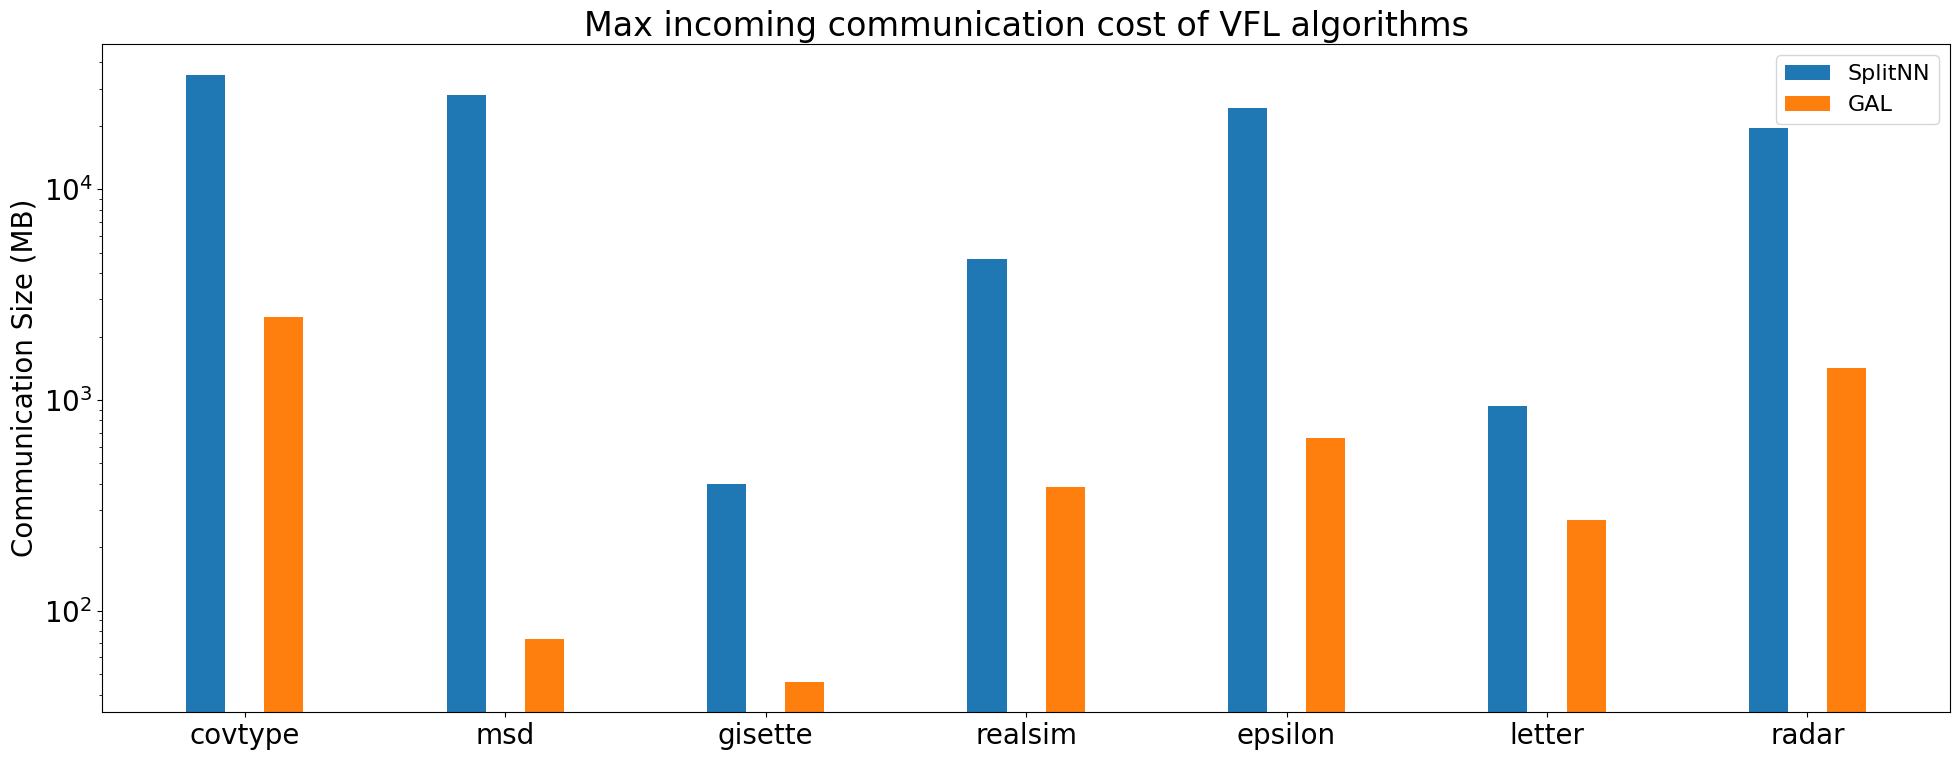

In [8]:
# plot the communication cost of each algorithm in a bar chart
algorithm_list = ['SplitNN', 'C-VFL', 'GAL', 'SecureBoost']

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(len(dataset_list))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width, splitnn_comm_max_in_list, width, label='SplitNN')
# rects2 = ax.bar(x, cvfl_comm_max_in_list, width, label='C-VFL')
rects3 = ax.bar(x + width, gal_comm_max_in_list, width, label='GAL')
# rects4 = ax.bar(x + 2 * width, secureboost_comm_max_in_list, width, label='FedTree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Communication Size (MB)')
ax.set_title('Max incoming communication cost of VFL algorithms')
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend(fontsize=16)
ax.set_yscale('log')

fig.tight_layout()
fig.savefig('fig/comm_max_in_real_dist.png')
plt.show()

# Max Outgoing (TX)

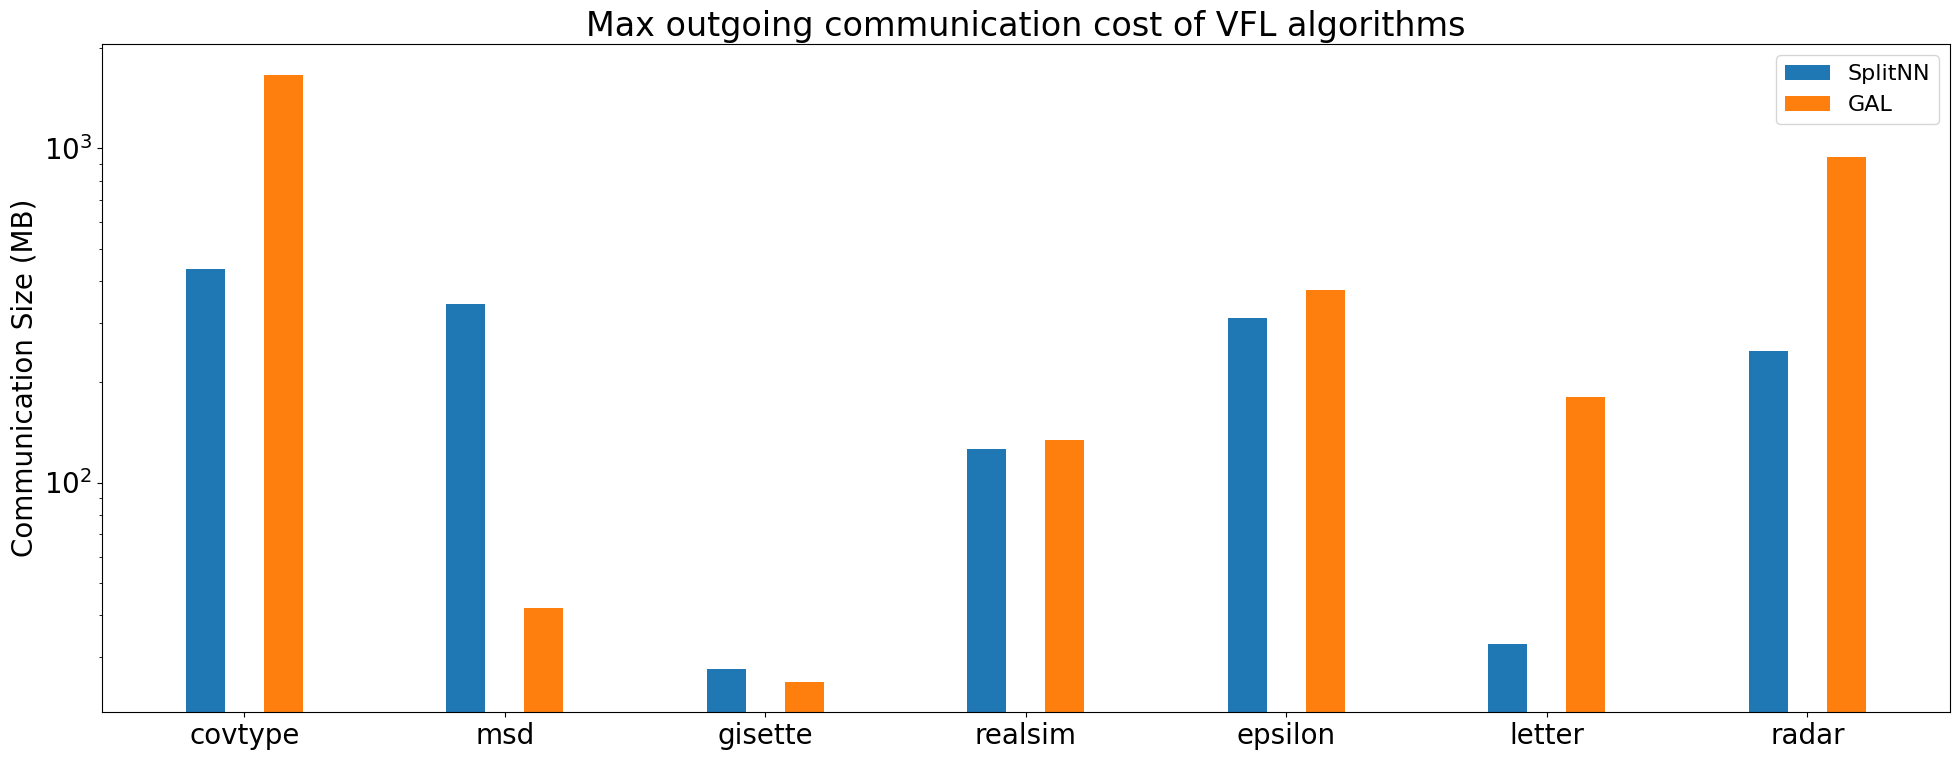

In [9]:
# plot the communication cost of each algorithm in a bar chart
algorithm_list = ['SplitNN', 'C-VFL', 'GAL', 'SecureBoost']

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(len(dataset_list))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width, splitnn_comm_max_out_list, width, label='SplitNN')
# rects2 = ax.bar(x, cvfl_comm_max_out_list, width, label='C-VFL')
rects3 = ax.bar(x + width, gal_comm_max_out_list, width, label='GAL')
# rects4 = ax.bar(x + 2 * width, secureboost_comm_max_out_list, width, label='FedTree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Communication Size (MB)')
ax.set_title('Max outgoing communication cost of VFL algorithms')
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend(fontsize=16)
ax.set_yscale('log')

fig.tight_layout()
fig.savefig('fig/comm_max_out_real_dist.png')
plt.show()